# Predicting Heart Disease Using Machine Learning

This notebook will be examining various methods of Python-based machine learning (ML) and data science libraries.

Predictions will be made from data collected of various medical attributes.

The following approach will be used:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation




## 1. Problem Definition

In a statement,
> Given clinical parameters of a patient, can a model be developed to reliably predict whether they have heart disease or not?




## 2. Data

The original data came from UCI Cleveland: https://archive.ics.uci.edu/ml/datasets/heart+disease

Version used here has been pre-processed and cross-referenced by user CHERNGS: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci




## 3. Evalutation

> If 95% accuracy in prediction during proof-of-concept, we can pursue further development of the model.

## 4. Features
 <br>**Data Dictionary**
<br>
There are 14 attributes:
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [181]:
# Regular EDA (exploratory data analysis) Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots within notebook
%matplotlib inline

# Model imports:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### 4.2 Load Data

In [8]:
# Our data will henceforth be referred to as df (DataFrame)
df = pd.read_csv("Data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


 ### 4.3 Data Exploration (Exploratory Data Analysis or EDA)
EDA Checklist:
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [10]:
df.head()
# Top five rows of df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [11]:
df.tail()
# Bottom five rows of df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [13]:
df.condition.value_counts()
# This tells us we have 160 patients with no heart disease(HD) and 137 with HD.

0    160
1    137
Name: condition, dtype: int64

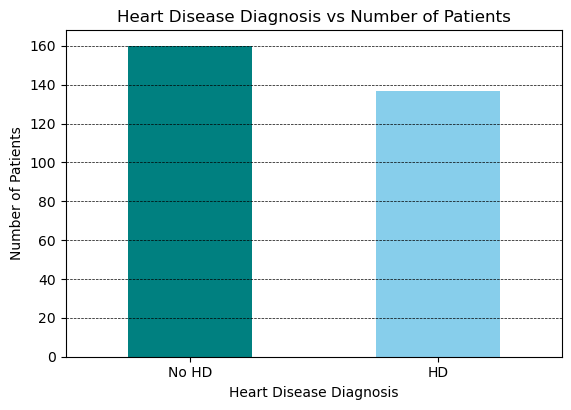

In [97]:
# Visualisation
fig, ax = plt.subplots()
df.condition.value_counts().plot(kind="bar", color=["teal", "skyblue"])
plt.title("Heart Disease Diagnosis vs Number of Patients")
plt.xlabel("Heart Disease Diagnosis")
plt.ylabel("Number of Patients")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis="y")
ax.set_xticklabels(["No HD", "HD"])
fig.autofmt_xdate(ha="center",rotation=0)
plt.show()
plt.close()

This is a fairly balanced classification problem at first glance. Our balance of no HD and HD (0 and 1, respectively is fairly balanced)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


This data looks like has been well cleaned (sorted). The dtypes are all int/float for our ML algorithm(s).

In [59]:
# Any missing values?
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

No missing values. Looks like this data has already been cleaned resonably well so far.

Quick overview of summary statistics:

In [60]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


### Heart Disease Frequency vs Sex

0 = Female <br>
1 = Male<br>
<br>
0 = No HD <br>
1 = HD

In [62]:
df.sex.value_counts()

1    201
0     96
Name: sex, dtype: int64

In [69]:
# Compare target column with sex column
pd.crosstab(df.condition, df.sex)

sex,0,1
condition,,
0,71,89
1,25,112


According to our dataset: <br>
Women (0 in the sex column) have a 73.9% chance of having HD. <br>
Men (1 in the sex column) have a 55.8% chance of having HD. <br><br>
46.1% of our dataset overall have HD.<br>
We need to keep this in mind, particularly for women in this dataset that they have a disproportionately (it seems) higher likelihood of getting a HD diagnosis.

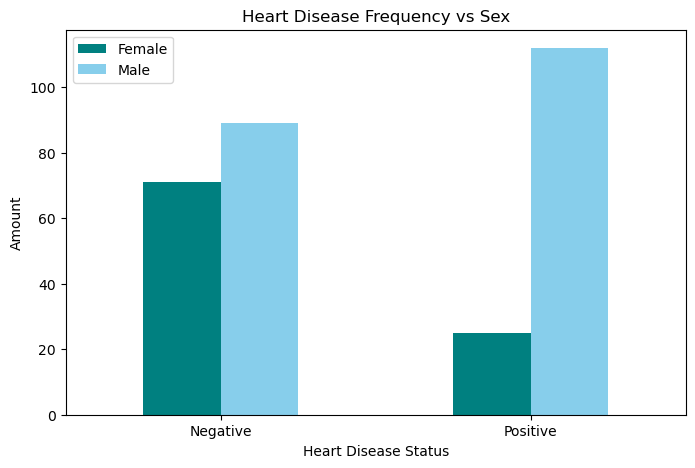

In [96]:
# Create a plot of crosstab:
pd.crosstab(df.condition, df.sex).plot(kind="bar",
                                    figsize=(8, 5),
                                    color=["teal", "skyblue"])

plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("Heart Disease Status")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks([0, 1], ['Negative', 'Positive'],
           rotation=0)
plt.show()
plt.close()

#### Histograms comparing the distribution of maximum heart rates (thalach) for men and women

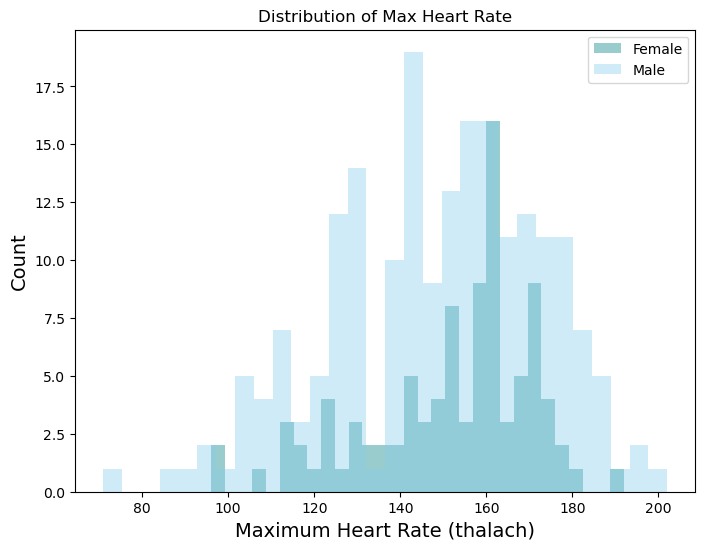

In [142]:
plt.figure(figsize=(8,6))
plt.hist(df['thalach'][df['sex'] == 0], bins=30, alpha=0.4, label="Female", color="teal")
plt.hist(df['thalach'][df['sex'] == 1], bins=30, alpha=0.4, label="Male", color="skyblue")
plt.xlabel("Maximum Heart Rate (thalach)", size=14)
plt.ylabel("Count", size=14)
plt.title("Distribution of Max Heart Rate")
plt.legend(loc='upper right')
plt.show()
plt.close()

### Distribution of age vs max heart rate

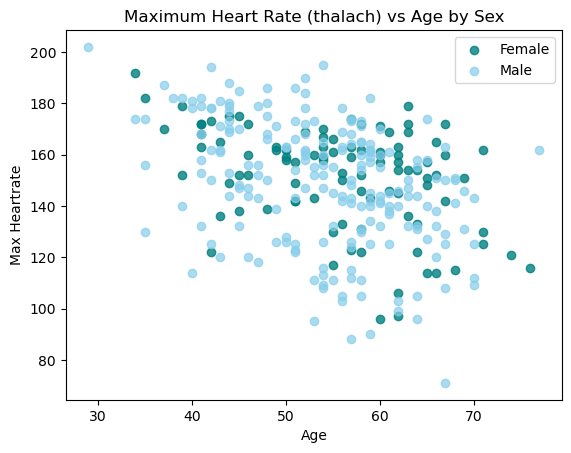

In [156]:
ax, fig = plt.subplots()
plt.scatter(df['age'][df['sex'] == 0], df['thalach'][df['sex'] == 0], c="teal", label="Female", alpha=0.8)
plt.scatter(df['age'][df['sex'] == 1], df['thalach'][df['sex'] == 1], c="skyblue", label="Male", alpha=0.7)
plt.legend()
plt.title("Maximum Heart Rate (thalach) vs Age by Sex")
plt.xlabel("Age")
plt.ylabel("Max Heartrate")
plt.show()
plt.close()

Let's refine this to split between those with and without HD

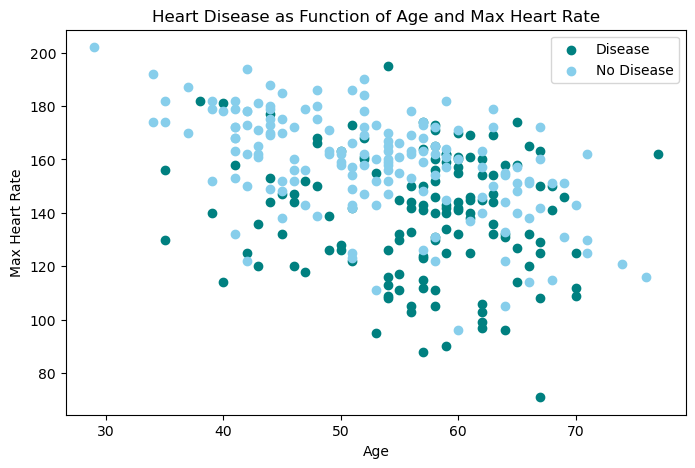

In [157]:
# Create another figure
plt.figure(figsize=(8, 5))

# Scatter with postivie examples
plt.scatter(df.age[df.condition==1],
            df.thalach[df.condition==1],
            c="teal")

# Scatter with negative examples
plt.scatter(df.age[df.condition==0],
            df.thalach[df.condition==0],
            c="skyblue")

# Add some helpful info
plt.title("Heart Disease as Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

### Heart Disease Count per Chest Pain Type

Reminder of the categories:<br>
* cp - chest pain type:
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

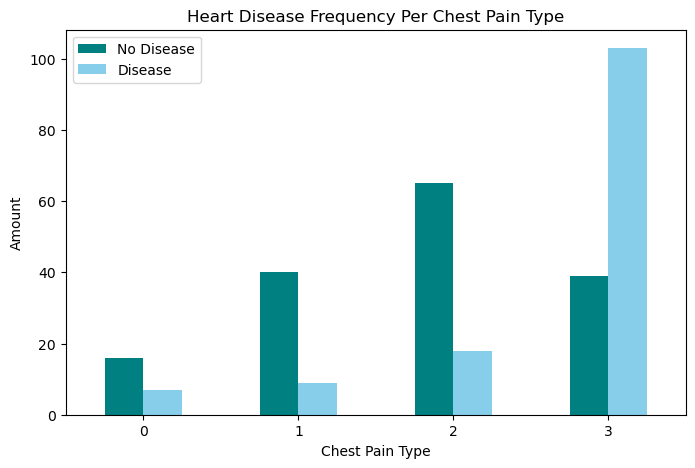

In [159]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.condition).plot(kind="bar",
                                   figsize=(8, 5),
                                   color=["teal", "skyblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### Correlation matrix of above data:

In [161]:
df_corr = df.corr()
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


Absolute nightmare to visualise... let's pretty it up:

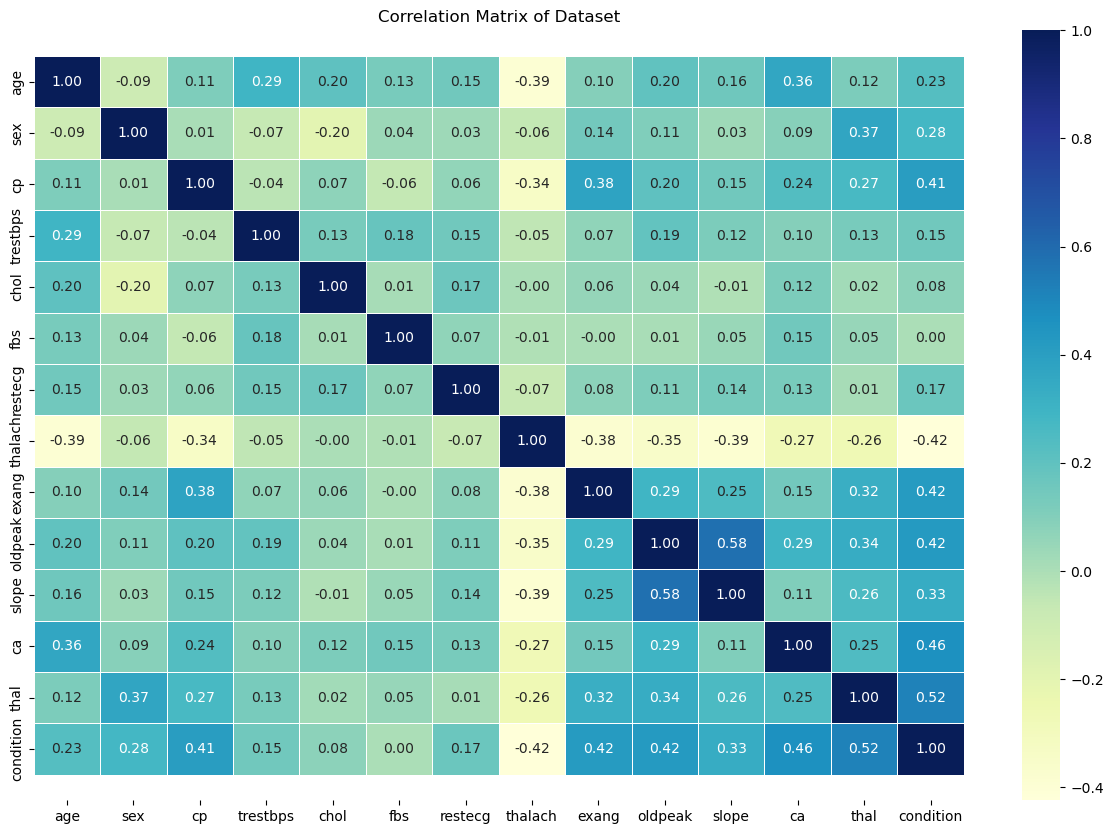

In [164]:
corr_matrix = df_corr
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Matrix of Dataset")
plt.show()
plt.close()

## 5. Modelling

Referring back to our problem defintion: this is fundamentally a classification problem we want 95% accuracy with.

### 5.1 Split Data into X (features) and Y (labels)

In [165]:
X = df.drop("condition", axis=1)

y = df["condition"]

### 5.2 Split Data into Training and Test Sets

In [168]:
# This allows anyone else to have same comparison data that is pseudo random on another device
np.random.seed(92)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

Now we've got our data split into training and test sets, time to build the model.
We'll train it (finding patterns) using the training set.

Test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

We're going to put our three models into a dictionary purely to speed up the typing process later, more efficient coding and all. (Thanks for the tip Daniel from ZtM!)

In [169]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn ML models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(92)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [170]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/Users/josh/Desktop/ml_course/heart-disease-project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/josh/Desktop/ml_course/heart-disease-project/env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the v

{'Logistic Regression': 0.8833333333333333,
 'KNN': 0.6,
 'Random Forest': 0.8333333333333334}

### 5.3 Model Comparison

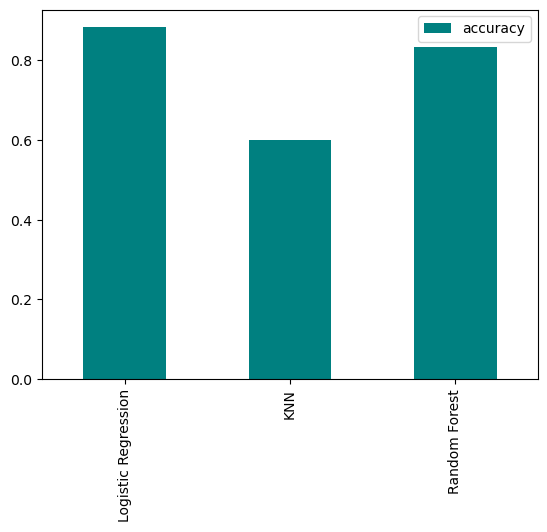

In [171]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color="teal")
plt.show()
plt.close()

We've got our baseline model (above). Now let's tune these and see what we get.
<br><br>
### 5.4 Hyperparameter Tuning

#### 5.4.1 Tuning KNN

In [184]:
# This rids of a library future warning. Does not change any of our results
import warnings;   warnings.filterwarnings("ignore")

In [185]:
train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [179]:
train_scores

[1.0,
 0.759493670886076,
 0.7805907172995781,
 0.7679324894514767,
 0.7637130801687764,
 0.7637130801687764,
 0.7341772151898734,
 0.7130801687763713,
 0.7046413502109705,
 0.7172995780590717,
 0.729957805907173,
 0.70042194092827,
 0.6877637130801688,
 0.6835443037974683,
 0.6919831223628692,
 0.6919831223628692,
 0.6919831223628692,
 0.7088607594936709,
 0.7130801687763713,
 0.7215189873417721]

In [186]:
test_scores

[0.6166666666666667,
 0.5333333333333333,
 0.6333333333333333,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6,
 0.6333333333333333,
 0.65,
 0.6666666666666666,
 0.6666666666666666,
 0.65,
 0.6166666666666667,
 0.6166666666666667,
 0.6166666666666667,
 0.65,
 0.5833333333333334,
 0.6333333333333333,
 0.5833333333333334]

#### Visualisation of Baseline Model So Far:

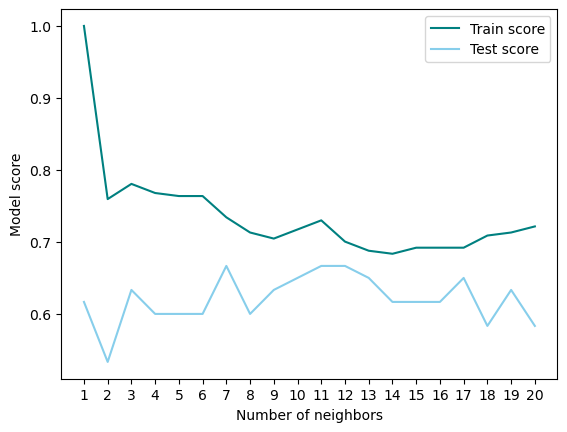

Maximum KNN score on the test data: 66.67%


In [188]:
plt.plot(neighbors, train_scores, label="Train score", color="teal")
plt.plot(neighbors, test_scores, label="Test score",color="skyblue")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.show()
plt.close()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

The maximum score we could get with this model was effectively 67%, not good enough. Let's try our other two models (Logistic Regression and Random Forest).

 #### 5.4.2 Tuning Logistic Regression
We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [189]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Grids are now set up, let's tune:

In [191]:
# Tune LogisticRegression

np.random.seed(92)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [192]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

Now we've got our best parameters:

In [193]:
rs_log_reg.score(X_test, y_test)

0.8666666666666667

Logistic Regression scores 86.7%, not bad. Certainly better than KNN, but not quite where we want it.

 #### 5.4.3 Tuning Random Forest Classifier(RFC)


In [194]:
# Setup random seed
np.random.seed(92)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [195]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 7,
 'max_depth': 5}

In [196]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8333333333333334

RFC gets 83%, not bad, but not 95% yet.

#### 5.4.4 Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [197]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [198]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [199]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8666666666666667

### 5.5 Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [200]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

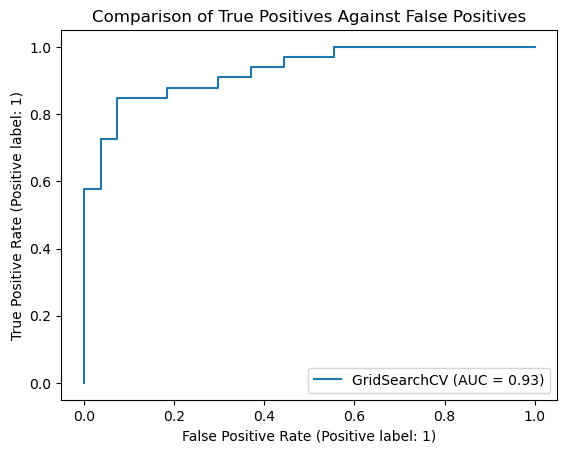

In [205]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)
plt.title("Comparison of True Positives Against False Positives")
plt.show()
plt.close()

In [206]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[24  3]
 [ 5 28]]


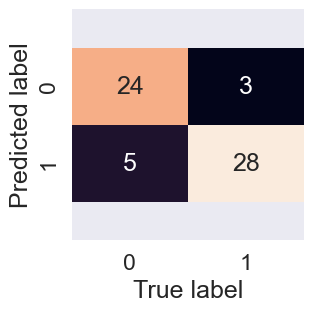

In [207]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [208]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.90      0.85      0.88        33

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



### 5.6 Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [209]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [210]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=4.893900918477489,
                         solver="liblinear")

In [211]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.61666667, 0.86666667, 0.81355932, 0.93220339, 0.81355932])

In [212]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8085310734463278

In [213]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8680030721966207

In [214]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.7261904761904762

In [215]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.7374472351604837

#### Visualisation of Cross-Validation Metrics

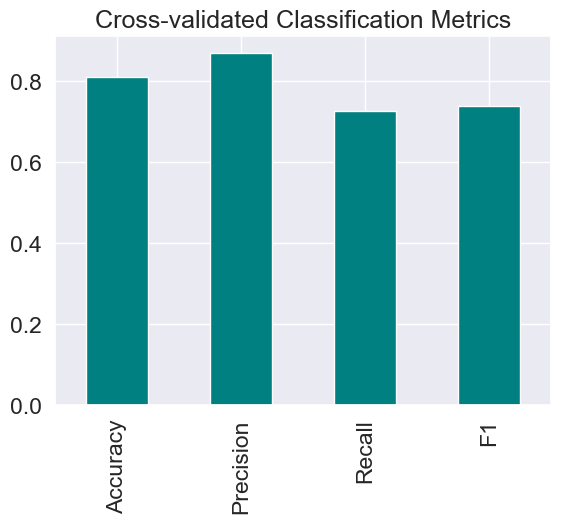

In [219]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics",
                      legend=False,
                      color="teal")
plt.show()
plt.close()

### 5.7 Feature Importance <br>
Feature importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each ML model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

#### 5.7.1 Feature Importance: Logistic Regression

In [220]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=4.893900918477489,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [221]:
# Check coef_
clf.coef_

array([[-0.01755339,  1.31606053,  0.67508853,  0.02262475,  0.00263143,
        -0.66835057,  0.16584727, -0.03213043,  0.61831228,  0.15585078,
         0.38784375,  1.16914016,  0.63110907]])

In [222]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [223]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.017553391086430545,
 'sex': 1.3160605337466869,
 'cp': 0.6750885281066787,
 'trestbps': 0.022624750978761668,
 'chol': 0.0026314290027867177,
 'fbs': -0.6683505684952248,
 'restecg': 0.16584726609362932,
 'thalach': -0.032130425430226414,
 'exang': 0.6183122844166536,
 'oldpeak': 0.15585078020210047,
 'slope': 0.38784375484588285,
 'ca': 1.1691401640568888,
 'thal': 0.6311090711451025}

#### Visualisation of Feature Importance

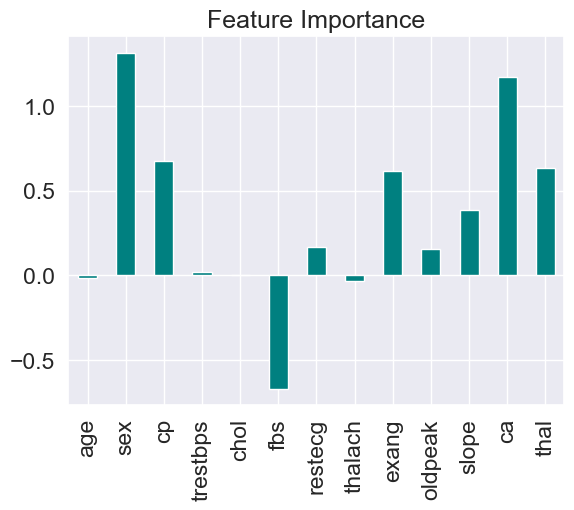

In [225]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, color="teal");
plt.show()
plt.close()

## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?

Could not quite hit it with this first initial milestone project for me from ZtM but absolutely enjoyed the ride and look forward to more.